In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
import os

folder = 'data/'

labels = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

print(labels)


['Lung Squamous Cell Carcinoma', 'Pancreatic Adenocarcinoma', 'Kidney Renal Clear Cell Carcinoma', 'Uveal Melanoma', 'Breast Invasive Carcinoma', 'Lung Adenocarcinoma']


In [3]:
def retrieve_data(data_path, filenames):
    list_of_dfs = []
    for i in range(0, len(filenames)):
        if ('annotations.txt' in filenames[i]):
            break
        inner_data_path = data_path + filenames[i]
        df = pd.read_csv(inner_data_path, sep='	', header=0)
        df = df[['miRNA_ID','reads_per_million_miRNA_mapped']]
        list_of_dfs.append(df)
    return list_of_dfs
    

In [4]:
def make_df(list_of_dfs, cancer_type):
    data = [] 
    labels = list_of_dfs[0]['miRNA_ID']
    for df in list_of_dfs:
        data.append(df['reads_per_million_miRNA_mapped'])

    big_df = pd.DataFrame(data)
    big_df.columns = labels
    big_df = big_df.reset_index(drop=True)
    big_df['diagnosis'] = cancer_type
    #big_df.rename(columns = {'miRNA_ID':'Index'}, inplace = True)
    
    return big_df

In [5]:
dp = 'data/Breast Invasive Carcinoma/MANIFEST.txt'
df = pd.read_csv(dp, sep='	', header=0)
filenames = df['filename']
breast = retrieve_data('data/Breast Invasive Carcinoma/', filenames)

In [6]:
def create_data_frame(labels):
    list_of_dfs = []
    for name in labels:
        dp = 'data/' + name + '/'
        df = pd.read_csv(dp + 'MANIFEST.txt', sep='	', header=0)
        filenames = df['filename']
        retrieve = retrieve_data(dp, filenames)
        new_df = make_df(retrieve, name)
        list_of_dfs.append(new_df)
    final_df = pd.concat(list_of_dfs)
    return final_df

create_data_frame() brings everything together and returns a final data frame with all of the types of cancer included.

In [7]:
big_list = create_data_frame(labels)
big_list.head()

miRNA_ID,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,diagnosis
0,9337.616622,9138.715586,9344.771335,31965.113617,1151.908878,606.004236,538.749928,2435.464484,2375.364890,713.324938,...,7.870185,0.000000,132.362200,11.447542,0.0,8.585656,66.538836,286.188541,10480.224372,Lung Squamous Cell Carcinoma
1,9197.286767,9285.825906,9305.312083,15457.836262,1602.407054,307.805936,1449.544610,6487.383740,6523.707489,610.693031,...,15.134895,0.189186,49.566783,4.351282,0.0,21.188854,49.755969,276.779400,38726.413684,Lung Squamous Cell Carcinoma
2,6494.512652,6466.129570,6593.853441,16025.435876,552.601237,437.331168,554.918223,1990.001625,2008.247892,300.049728,...,18.825514,0.000000,207.659899,4.923596,0.0,13.322671,49.235959,148.287124,16656.525024,Lung Squamous Cell Carcinoma
3,8143.014860,8138.517821,8146.387640,33502.946685,1621.182856,1485.147402,845.443487,3048.993000,3046.744480,364.260226,...,32.603539,0.000000,256.331270,0.000000,0.0,16.863899,74.201157,617.218716,36108.981263,Lung Squamous Cell Carcinoma
4,9644.895834,9677.261256,9761.719596,9897.346128,944.145604,442.019195,659.329888,4091.605858,4252.508243,684.605741,...,8.939021,0.000000,99.562204,0.308242,0.0,30.824212,55.483581,233.955767,10677.815168,Lung Squamous Cell Carcinoma


In [8]:
#Finding how balanced the data is
counts = big_list['diagnosis'].value_counts(sort=False)
counts

Lung Squamous Cell Carcinoma          478
Pancreatic Adenocarcinoma             178
Kidney Renal Clear Cell Carcinoma     544
Uveal Melanoma                         80
Breast Invasive Carcinoma            1096
Lung Adenocarcinoma                   519
Name: diagnosis, dtype: int64

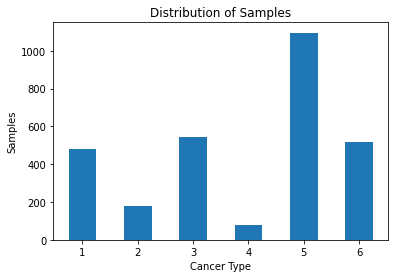

In [9]:
#Printing the graph
X_axis = np.arange(len(labels))
  
plt.bar(X_axis, counts, .5)
  
plt.xticks(X_axis, [1,2,3,4,5,6])
plt.xlabel("Cancer Type")
plt.ylabel("Samples")
plt.title("Distribution of Samples")

plt.show()

In [10]:
def double_check(data_frames):
    for df in data_frames:
        if (data_frames[0]['miRNA_ID'].equals(df['miRNA_ID']) == False):
            return False
    return True

In [11]:
#implementation of the scikit k-nearest neighbors

big_list = big_list.fillna(0)

features = big_list.drop("diagnosis", axis='columns')
targets = big_list['diagnosis']

features_norm = (features-features.min())/(features.max()-features.min())
features_norm = features_norm.fillna(0)

0.8626943005181347
[[395   2  18   7   3   0]
 [  9 198   0   0   0   0]
 [ 26   0 139  15  24   0]
 [ 20   0  20 156   8   0]
 [  3   0   2   0  74   0]
 [  1   0   0   1   0  37]]


<AxesSubplot:>

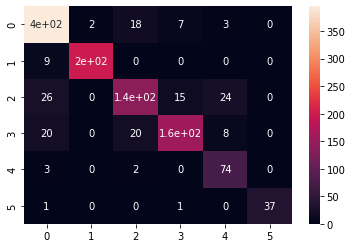

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features_norm, targets, test_size=0.4, random_state=42)
#KNN
neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(X_train, y_train)

preds1 = neigh.predict(X_test)
knnCM = confusion_matrix(y_test, preds1)
print(accuracy_score(y_test, preds1))
print(confusion_matrix(y_test, preds1))

import seaborn as sns
ax= plt.subplot()
sns.heatmap(knnCM, annot=True, ax=ax)

# ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
# ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(labels);


0.9689119170984456


<AxesSubplot:>

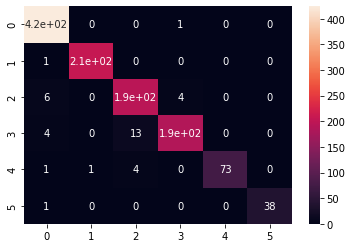

In [16]:
#RFC
clf = RandomForestClassifier(max_depth=None, random_state=0)
clf.fit(X_train, y_train)
preds2 = clf.predict(X_test)
print(accuracy_score(y_test, preds2))

rfcCM = confusion_matrix(y_test, preds2)
sns.heatmap(rfcCM, annot=True)

Accuracy of KNN Models: [0.8411053540587219, 0.8523316062176166, 0.8626943005181347, 0.8583765112262521, 0.8540587219343696, 0.8514680483592401, 0.8488773747841105, 0.844559585492228, 0.8471502590673575, 0.8411053540587219, 0.8376511226252159, 0.8341968911917098, 0.8324697754749568, 0.8281519861830743, 0.8221070811744386, 0.8212435233160622, 0.812607944732297]


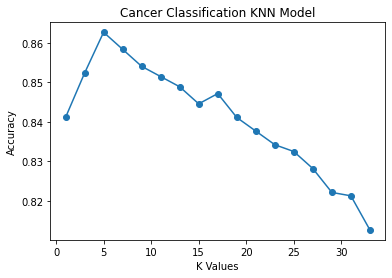

In [22]:
scores = []
for k in range(1,35,2):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    preds = neigh.predict(X_test)
    scores.append(accuracy_score(y_test, preds))

plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('Cancer Classification KNN Model')
plt.plot(np.arange(1,35,2),scores, "o-")
print("Accuracy of KNN Models:", scores)

In [23]:
from sklearn.svm import LinearSVC, SVC
#why does this work, because there are a large number of features and a moderate number of examples so no
# real need to increase the complexity, can be accomplished linearly?
svc = LinearSVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9689119170984456

In [24]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state=0).fit(X_train, y_train)
logReg.score(X_test, y_test)

0.966321243523316